In [3]:
import matplotlib.pyplot as plt
import re

In [52]:
def plot_files(files, title=None):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12, 4))
    
    for train_name, val_name, model_name, color in files:

        with open(train_name, 'r') as f:
            log_train = f.read()

        with open(val_name, 'r') as f:
            log_val = f.read()


        train_losses = re.findall(r"Train Loss=(\d+\.\d+)", log_train)
        val_losses = re.findall(r"Val Loss=(\d+\.\d+)", log_train)
        mean_return = re.findall(r"Mean Return=(\d+\.\d+)", log_train)

        final_metric = re.findall(r"Average reward over 5 episodes: (\d+\.\d+)", log_val)


        train_losses = [float(x) for x in train_losses]
        val_losses = [float(x) for x in val_losses]
        mean_return = [float(x) for x in mean_return]
        final_metric = float(final_metric[0])

        epochs = range(1, len(train_losses) + 1)

        ax1.plot(epochs, train_losses, color=color, label=model_name)
        ax1.set_title('Train Loss')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax1.legend()
        ax1.grid(True)

        ax2.plot(epochs, val_losses, color=color, label=model_name)
        ax2.set_title('Validation Loss')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Loss')
        ax2.legend()
        ax2.grid(True)

        ax3.plot(epochs, mean_return, color=color, label=model_name)
        ax3.set_title('Mean Return')
        ax3.set_xlabel('Epoch')
        ax3.set_ylabel('Return')
        ax3.legend()
        ax3.grid(True)

        ax4.bar(model_name, final_metric, color=color, linestyle='-')
        ax4.axhline(y=500, color='purple', linestyle='--', linewidth=1)
        ax4.set_title('Average reward over 5 episodes')
        ax4.grid(True)

    if title is not None:
        fig.suptitle(title)

    plt.tight_layout()
    plt.show()

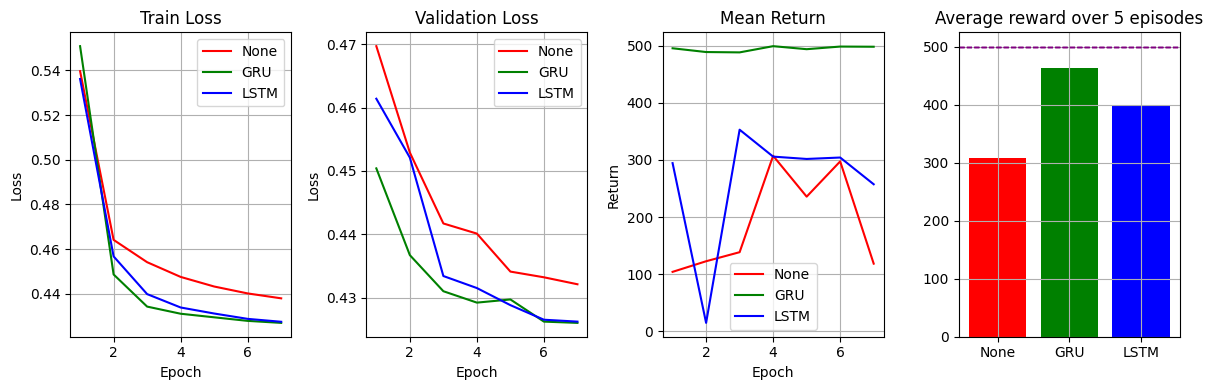

In [53]:
files = [
    ('results/none_train.txt', 'results/none_val.txt', 'None', 'red'),
    ('results/gru_train.txt', 'results/gru_val.txt', 'GRU', 'green'),
    ('results/lstm_train.txt', 'results/lstm_val.txt', 'LSTM', 'blue')
]

plot_files(files)

**Вывод**
- сходятся примерно одинаково, но решения с памятью достигают меньшего лосса
- на дефолтных параметрах лучше всего работает GRU

# Исследуем context length

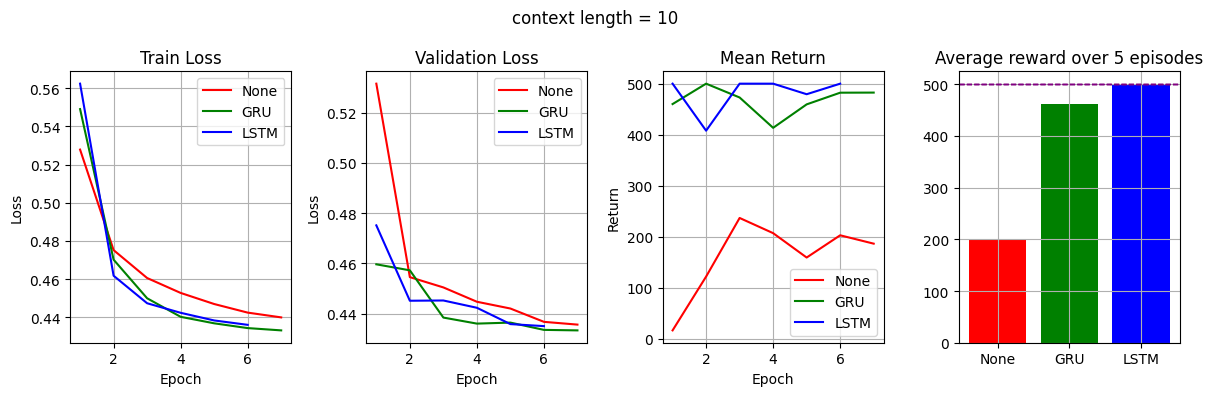

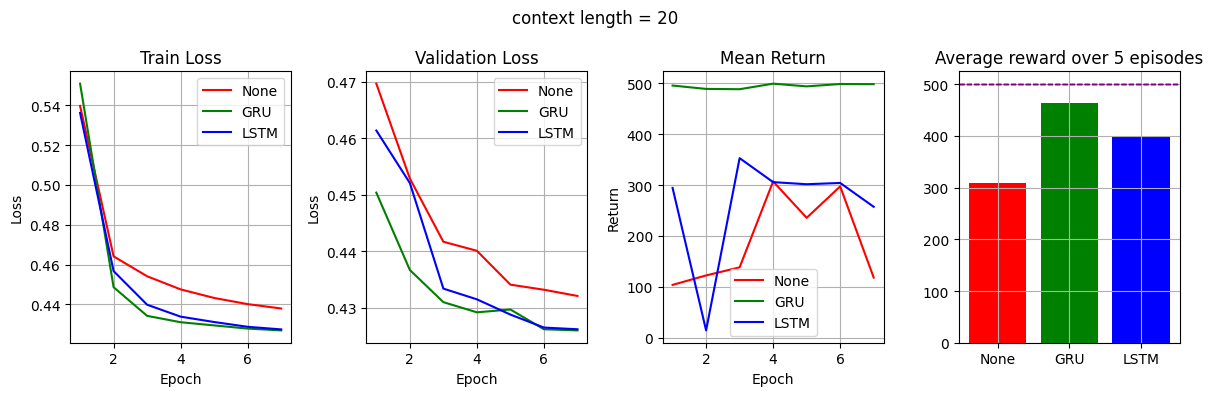

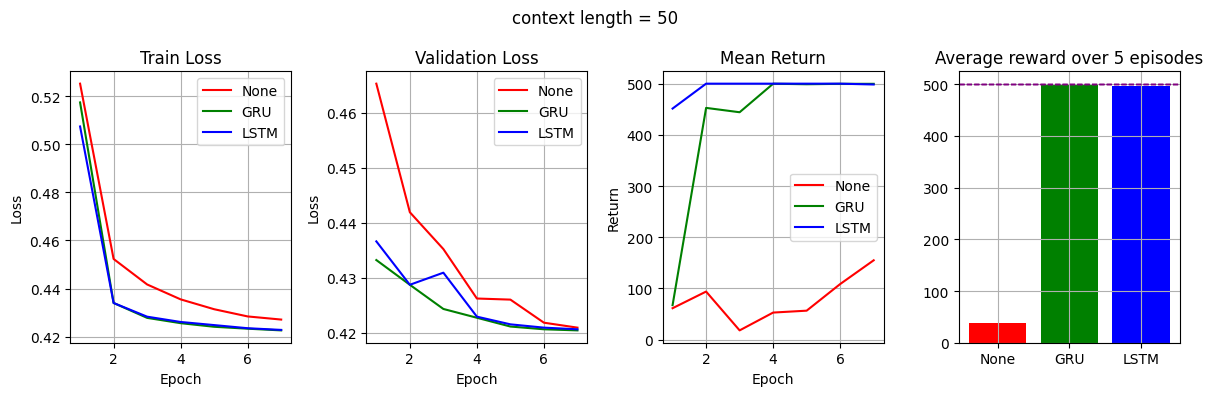

In [54]:
files = [
    ('results/none_train_clen_10.txt', 'results/none_val_clen_10.txt', 'None', 'red'),
    ('results/gru_train_clen_10.txt', 'results/gru_val_clen_10.txt', 'GRU', 'green'),
    ('results/lstm_train_clen_10.txt', 'results/lstm_val_clen_10.txt', 'LSTM', 'blue')
]
plot_files(files, title='context length = 10')

files = [
    ('results/none_train.txt', 'results/none_val.txt', 'None', 'red'),
    ('results/gru_train.txt', 'results/gru_val.txt', 'GRU', 'green'),
    ('results/lstm_train.txt', 'results/lstm_val.txt', 'LSTM', 'blue')
]

plot_files(files, title='context length = 20')

files = [
    ('results/none_train_clen_50.txt', 'results/none_val_clen_50.txt', 'None', 'red'),
    ('results/gru_train_clen_50.txt', 'results/gru_val_clen_50.txt', 'GRU', 'green'),
    ('results/lstm_train_clen_50.txt', 'results/lstm_val_clen_50.txt', 'LSTM', 'blue')
]

plot_files(files, title='context length = 50')

**Вывод**
- при уменьшении контекстной длины лучше работает LSTM
- при увеличении они уравниваются с GRU и достигают максимальной точности
- решение без памяти сильно просидает в качестве при увеличении контекстной длины

# Исследуем training set size

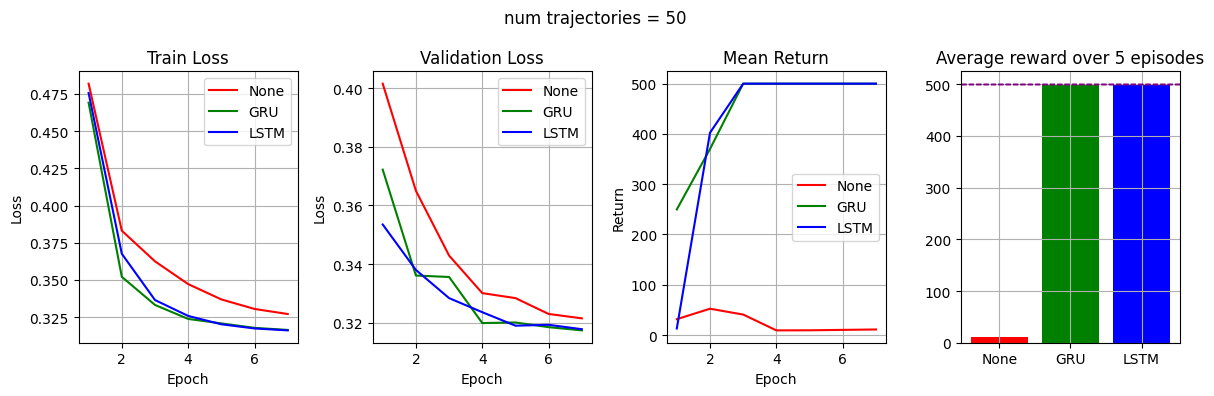

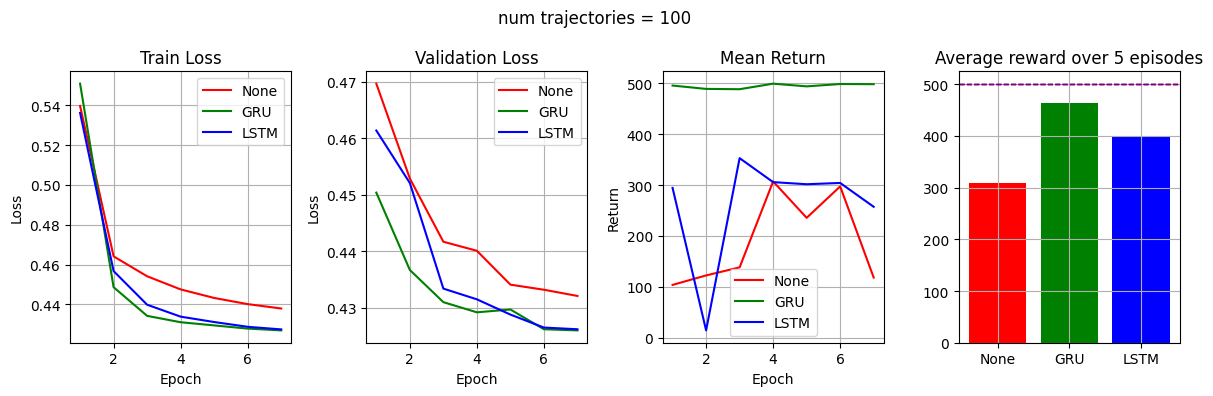

In [55]:
files = [
    ('results/none_train_tsize_50.txt', 'results/none_val_tsize_50.txt', 'None', 'red'),
    ('results/gru_train_tsize_50.txt', 'results/gru_val_tsize_50.txt', 'GRU', 'green'),
    ('results/lstm_train_tsize_50.txt', 'results/lstm_val_tsize_50.txt', 'LSTM', 'blue')
]
plot_files(files, title='num trajectories = 50')

files = [
    ('results/none_train.txt', 'results/none_val.txt', 'None', 'red'),
    ('results/gru_train.txt', 'results/gru_val.txt', 'GRU', 'green'),
    ('results/lstm_train.txt', 'results/lstm_val.txt', 'LSTM', 'blue')
]

plot_files(files, title='num trajectories = 100')

**Выводы**
- при половине тренировочных данных решения с памятью идеально сходятся, тогда как решение без памяти получает почти нулевое качество